## **Tratamento dos dados**

TODO - escrever introdução sobre o processo de transformação dos dados

### Dataframes

- Vagas
- Prospects
- Applicants

In [8]:
#!pip uninstall -y  scikit-learn imbalanced-learn sklearn-compat pandas numpy seaborn matplotlib 

In [9]:
#!pip install --no-cache-dir  scikit-learn==1.4.2 imbalanced-learn==0.12.4  pandas numpy seaborn matplotlib sentence-transformers

In [10]:
#!pip list | grep -E 'yellowbrick|optuna|scipy|sklearn'


In [79]:
import pandas as pd
from ast import literal_eval
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

### **Importando e tratando os dataframes**

#### Vagas

In [82]:
df_vagas = pd.read_json('../dados/vagas.json', convert_dates=False)
df_vagas.head()

,5185,5184,5183,5182,5181,5180,5179,5178,5177,5176,...,12373,12372,12371,12370,12369,12368,12367,12366,12365,12364
informacoes_basicas,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...",...,"{'data_requicisao': '29-02-2024', 'limite_espe...","{'data_requicisao': '29-02-2024', 'limite_espe...","{'data_requicisao': '29-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '27-02-2024', 'limite_espe...","{'data_requicisao': '27-02-2024', 'limite_espe...","{'data_requicisao': '27-02-2024', 'limite_espe..."
perfil_vaga,"{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'Paraná', 'cidade...",...,"{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid..."
beneficios,"{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '- p/ mês (168h)', 'valor_comp...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",...,"{'valor_venda': '270,00 -', 'valor_compra_1': ...","{'valor_venda': '2.300,00 -', 'valor_compra_1'...","{'valor_venda': '168 -', 'valor_compra_1': 'Ab...","{'valor_venda': '78,00 - p/ hora', 'valor_comp...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '123,00 -', 'valor_compra_1': ...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe..."


In [83]:
df_vagas = df_vagas.T
df_vagas["id_vaga"] = df_vagas.index.values
df_vagas.sort_values(by=['id_vaga'], inplace=True)
df_vagas.reset_index(inplace=True, drop=True)
df_vagas.head()

,informacoes_basicas,perfil_vaga,beneficios,id_vaga
0,"{'data_requicisao': '02-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '- p/ mês (168h)', 'valor_comp...",2
1,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'Paraná', 'cidade...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",3
2,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'Paraná', 'cidade...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",4
3,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",5
4,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",6


In [84]:
df_vagas.shape

(14081, 4)

In [85]:
df_vagas_info_normalized = pd.json_normalize(df_vagas['informacoes_basicas'])
df_vagas_perfil_normalized = pd.json_normalize(df_vagas['perfil_vaga'])
df_vagas_beneficios_normalized = pd.json_normalize(df_vagas['beneficios'])

df_vagas_normalized = pd.concat([df_vagas["id_vaga"], df_vagas_info_normalized, df_vagas_perfil_normalized, df_vagas_beneficios_normalized], axis=1)
df_vagas_normalized.head()

,id_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,habilidades_comportamentais_necessarias,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2
0,2,02-12-2018,00-00-0000,Analista de Negocios SR,Não,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,NaN,- p/ mês (168h),Mês 168,
1,3,04-12-2018,00-00-0000,Arquiteto de Sistemas SR,Não,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,NaN,-,hora,
2,4,04-12-2018,00-00-0000,Analista de Projetos SR,Não,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,NaN,-,hora,
3,5,04-12-2018,00-00-0000,Analista de Sistemas SR,Não,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,NaN,-,hora,
4,6,04-12-2018,00-00-0000,Analista de Sistemas SR,Não,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,NaN,-,hora,


In [86]:
df_vagas_normalized.shape

(14081, 45)

In [87]:
df_vagas_normalized.isnull().sum()

id_vaga                                        0
data_requicisao                                0
limite_esperado_para_contratacao               0
titulo_vaga                                    0
vaga_sap                                       0
cliente                                        0
solicitante_cliente                            0
empresa_divisao                                0
requisitante                                   0
analista_responsavel                           0
tipo_contratacao                               0
prazo_contratacao                              0
data_inicial                                9625
data_final                                  9625
objetivo_vaga                                  0
prioridade_vaga                                0
origem_vaga                                    0
superior_imediato                             42
nome                                        4456
telefone                                    4762
nome_substituto     

In [88]:
df_vagas_normalized = df_vagas_normalized.fillna('')
df_vagas_normalized["limite_esperado_para_contratacao"] = df_vagas_normalized["limite_esperado_para_contratacao"].replace({'00-00-0000': ''})
df_vagas_normalized["vaga_sap"] = df_vagas_normalized["vaga_sap"].replace({'Não': 0, 'Sim': 1})

In [89]:
df_vagas_normalized.head()

,id_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,habilidades_comportamentais_necessarias,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,,- p/ mês (168h),Mês 168,
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,,-,hora,
2,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,,-,hora,
3,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,,-,hora,
4,6,04-12-2018,,Analista de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,,-,hora,


In [90]:
df_vagas_normalized[df_vagas_normalized["id_vaga"] == 11019]

,id_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,habilidades_comportamentais_necessarias,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2
10916,11019,09-02-2023,15-02-2023,LIder de projetos,0,Jenkins-Walker,Valentim Duarte,Decision São Paulo,Vitória Melo,Laura Pacheco,...,Financeira/Controladoria-,8 anos de experiência em gestão de projetos co...,8 anos de experiência em gestão de projetos co...,,,,,"149,00 -","118,00",


#### Prospects

In [91]:
df_prospects = pd.read_json('../dados/prospects.json', convert_dates=False)
df_prospects.head()

,4530,4531,4532,4533,4534,4535,4536,4537,4538,4539,...,14213,14214,14215,14216,14217,14218,14219,14220,14221,14222
titulo,CONSULTOR CONTROL M,2021-2607395-PeopleSoft Application Engine-Dom...,,2021-2605708-Microfocus Application Life Cycle...,2021-2605711-Microfocus QTP - UFT Automation T...,Microfocus QTP - UFT Automation Testing-Lead-2...,Gestão De Incidentes Field Support - 11755457,PMO Practitioner - 11744940,,,...,,,,,SAP SD,Java Support Analyst,,Consultor Sênior Especialista SAP LES-TRA - 1433,Consultor Sênior Oracle EPM FCCS - 1434,
modalidade,,,,,,CLT,,,,,...,,,,,,,,,,
prospects,"[{'nome': 'José Vieira', 'codigo': '25632', 's...","[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '...",[],"[{'nome': 'Arthur Almeida', 'codigo': '26338',...","[{'nome': 'Ana Luiza Vieira', 'codigo': '26361...","[{'nome': 'Arthur Almeida', 'codigo': '26338',...","[{'nome': 'Sr. Cauã Vargas', 'codigo': '25362'...","[{'nome': 'Bárbara Nascimento', 'codigo': '252...",[],[],...,[],[],[],[],"[{'nome': 'Laís Duarte', 'codigo': '49670', 's...","[{'nome': 'Dr. Vitor Hugo Silva', 'codigo': '4...",[],"[{'nome': 'Ana Cardoso', 'codigo': '16828', 's...","[{'nome': 'Maria Eduarda Cassiano', 'codigo': ...",[]


In [92]:
df_prospects = df_prospects.T
df_prospects["id_vaga"] = df_prospects.index.values
df_prospects.sort_values(by=['id_vaga'], inplace=True)
df_prospects.reset_index(inplace=True, drop=True)
df_prospects.head()

,titulo,modalidade,prospects,id_vaga
0,,,[],0
1,,,[],1
2,Analista de Negocios SR,Cooperado,"[{'nome': 'Luiz Felipe Costela', 'codigo': '12...",2
3,Arquiteto de Sistemas SR,,"[{'nome': 'Sr. Luiz Fernando Fernandes', 'codi...",3
4,Analista de Projetos SR,,"[{'nome': 'Dra. Kamilly Nascimento', 'codigo':...",4


In [94]:
s = df_prospects.apply(lambda x: pd.Series(x['prospects']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'candidato'
df_stacked_prospects = df_prospects.drop('prospects', axis=1).join(s)
df_stacked_prospects.head(10)

,titulo,modalidade,id_vaga,candidato
0,,,0,NaN
1,,,1,NaN
2,Analista de Negocios SR,Cooperado,2,"{'nome': 'Luiz Felipe Costela', 'codigo': '125..."
3,Arquiteto de Sistemas SR,,3,"{'nome': 'Sr. Luiz Fernando Fernandes', 'codig..."
3,Arquiteto de Sistemas SR,,3,"{'nome': 'Dra. Allana Pacheco', 'codigo': '125..."
4,Analista de Projetos SR,,4,"{'nome': 'Dra. Kamilly Nascimento', 'codigo': ..."
5,Analista de Sistemas SR,,5,"{'nome': 'Luiz Felipe Moraes', 'codigo': '1262..."
5,Analista de Sistemas SR,,5,"{'nome': 'Dra. Aylla Monteiro', 'codigo': '126..."
5,Analista de Sistemas SR,,5,"{'nome': 'Cauê Teixeira', 'codigo': '11299', '..."
6,,,6,NaN


In [95]:
df_stacked_prospects.shape

(56702, 4)

In [96]:
df_stacked_prospects.isnull().sum()

titulo           0
modalidade       0
id_vaga          0
candidato     2943
dtype: int64

In [97]:
df_stacked_prospects.dropna(inplace=True)
df_stacked_prospects.reset_index(inplace=True, drop=True)

In [98]:
df_stacked_prospects.shape

(53759, 4)

In [99]:
df_prospects_list_normalized = pd.json_normalize(df_stacked_prospects['candidato'])
df_prospects_list_normalized = df_prospects_list_normalized.rename(columns={"codigo": "codigo_candidato"})
df_prospects_list_normalized["codigo_candidato"] = df_prospects_list_normalized["codigo_candidato"].apply(literal_eval)

df_prospects_normalized = pd.concat(
    [df_stacked_prospects["id_vaga"], 
     df_stacked_prospects["titulo"], 
     df_stacked_prospects["modalidade"], 
     df_prospects_list_normalized], axis=1)
df_prospects_normalized.head(10)

,id_vaga,titulo,modalidade,nome,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,2,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,12585,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros
1,3,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,12598,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
2,3,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,12595,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão
3,4,Analista de Projetos SR,,Dra. Kamilly Nascimento,12618,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão
4,5,Analista de Sistemas SR,,Luiz Felipe Moraes,12626,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas
5,5,Analista de Sistemas SR,,Dra. Aylla Monteiro,12624,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas
6,5,Analista de Sistemas SR,,Cauê Teixeira,11299,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
7,7,DBA SR,,Vitória da Cruz,12609,Inscrito,07-12-2018,,,Caroline Machado
8,7,DBA SR,,Luiz Felipe Porto,10086,Inscrito,13-12-2018,,,Caroline Machado
9,8,Analista Desenvolvedor,,Marina Peixoto,6729,Desistiu,07-12-2018,12-12-2018,,Liz Freitas


In [100]:
df_prospects_normalized.isnull().sum()

id_vaga               0
titulo                0
modalidade            0
nome                  0
codigo_candidato      0
situacao_candidado    0
data_candidatura      0
ultima_atualizacao    0
comentario            0
recrutador            0
dtype: int64

In [101]:
df_prospects_normalized.head()

,id_vaga,titulo,modalidade,nome,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,2,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,12585,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros
1,3,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,12598,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
2,3,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,12595,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão
3,4,Analista de Projetos SR,,Dra. Kamilly Nascimento,12618,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão
4,5,Analista de Sistemas SR,,Luiz Felipe Moraes,12626,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas


In [102]:
df_prospects_normalized[df_prospects_normalized["id_vaga"] == 11019]

,id_vaga,titulo,modalidade,nome,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
39084,11019,LIder de projetos,,Luiz Miguel Fernandes,42591,Prospect,17-04-2023,17-04-2023,,Lara Duarte
39085,11019,LIder de projetos,,Joaquim Montenegro,42071,Encaminhado ao Requisitante,10-03-2023,10-03-2023,Pretensão de 20k cooperado.,Lara Duarte
39086,11019,LIder de projetos,,Sr. Theodoro da Cruz,41741,Aprovado,16-02-2023,30-03-2023,Aguardando validação do burget pela equipe de ...,Elisa Barbosa
39087,11019,LIder de projetos,,Ravy Vieira,41729,Prospect,16-02-2023,16-02-2023,,Clara Rios
39088,11019,LIder de projetos,,Bruna Pires,41681,Prospect,14-02-2023,14-02-2023,,Maria Clara Pires
39089,11019,LIder de projetos,,Julia Farias,41030,Encaminhado ao Requisitante,13-02-2023,13-02-2023,,Clara Rios
39090,11019,LIder de projetos,,Isabel Montenegro,40977,Prospect,14-02-2023,14-02-2023,,Lara Duarte
39091,11019,LIder de projetos,,Dr. Otávio Sousa,40229,Prospect,14-02-2023,14-02-2023,,Clara Rios
39092,11019,LIder de projetos,,Maria Isis da Conceição,39715,Prospect,14-02-2023,14-02-2023,,Lara Duarte
39093,11019,LIder de projetos,,Laís Rezende,39476,Prospect,14-02-2023,15-02-2023,,Lara Duarte


#### Applicants

In [106]:
df_applicants = pd.read_json('../dados/applicants.json', convert_dates=False)
df_applicants.head()

,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
infos_basicas,"{'telefone_recado': '', 'telefone': '(11) 9704...","{'telefone_recado': '', 'telefone': '(11) 9372...","{'telefone_recado': '', 'telefone': '(11) 9239...","{'telefone_recado': '', 'telefone': '(11) 9810...","{'telefone_recado': '', 'telefone': '(11) 9251...","{'telefone_recado': '', 'telefone': '(11) 9498...","{'telefone_recado': '', 'telefone': '(11) 9484...","{'telefone_recado': '', 'telefone': '(31) 9986...","{'telefone_recado': '', 'telefone': '(11) 9288...","{'telefone_recado': '', 'telefone': '(11) 9535...",...,"{'telefone_recado': '', 'telefone': '(11) 9524...","{'telefone_recado': '', 'telefone': '(11) 9236...","{'telefone_recado': '', 'telefone': '(11) 9135...","{'telefone_recado': '', 'telefone': '(34) 9716...","{'telefone_recado': '', 'telefone': '(48) 9236...","{'telefone_recado': '', 'telefone': '(11) 9262...","{'telefone_recado': '', 'telefone': '(41) 9300...","{'telefone_recado': '', 'telefone': '(11) 9783...","{'telefone_recado': '', 'telefone': '(61) 9680...","{'telefone_recado': '', 'telefone': '(15) 9563..."
informacoes_pessoais,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...
informacoes_profissionais,"{'titulo_profissional': '', 'area_atuacao': ''...",{'titulo_profissional': 'Analista Administrati...,{'titulo_profissional': 'Administrativo | Fina...,"{'titulo_profissional': 'Área administrativa',...","{'titulo_profissional': '', 'area_atuacao': ''...",{'titulo_profissional': 'Administrativa/logíst...,{'titulo_profissional': 'Analista Administrati...,{'titulo_profissional': 'Desejo fazer parte do...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'titulo_profissional': '', 'area_atuacao': ''...",...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...",{'titulo_profissional': 'Crm / Líder de Projet...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':..."
formacao_e_idiomas,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{'nivel_academico': 'Ensino Superior Incomplet...,{'nivel_academico': 'Ensino Superior Completo'...,{'nivel_academico': 'Ensino Superior Incomplet...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': 'Ensino Técnico Completo',...",{'nivel_academico': 'Ensino Superior Cursando'...,{'nivel_academico': 'Ensino Superior Completo'...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'

In [107]:
df_applicants = df_applicants.T
df_applicants["codigo_candidato"] = df_applicants.index.values
df_applicants.sort_values(by=['codigo_candidato'], inplace=True)
df_applicants.reset_index(inplace=True, drop=True)
df_applicants.head()

,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,codigo_candidato
0,"{'telefone_recado': '', 'telefone': '', 'objet...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'id_ibrati': '', 'email_corporativo': '', 'ca...",,,0
1,"{'telefone_recado': '', 'telefone': '(11) 9988...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Consultor ABAP', 'are...",{'nivel_academico': 'Ensino Superior Completo'...,"{'id_ibrati': '', 'email_corporativo': '', 'ca...","\nexperiência em análise, desenvolvimento e im...",,1
2,"{'telefone_recado': '', 'telefone': '(11) 9671...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Consultor ABAP', 'are...",{'nivel_academico': 'Ensino Superior Completo'...,{},\n,,2
3,"{'telefone_recado': '', 'telefone': '(11) 9551...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Analista de BI', 'are...",{'nivel_academico': 'Ensino Superior Completo'...,{},\n,,3
4,"{'telefone_recado': '', 'telefone': '(11) 9129...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista/Coordenador ...,"{'nivel_academico': 'Pós Graduação Completo', ...",{},,,4


In [109]:
df_applicants_info_basic_normalized = pd.json_normalize(df_applicants['infos_basicas'])
df_applicants_info_pessoa_normalized = pd.json_normalize(df_applicants['informacoes_pessoais'])
df_applicants_info_prof_normalized = pd.json_normalize(df_applicants['informacoes_profissionais'])
df_applicants_formacao_normalized = pd.json_normalize(df_applicants['formacao_e_idiomas'])
df_applicants_cargo_normalized = pd.json_normalize(df_applicants['cargo_atual'])

df_applicants_normalized = pd.concat(
    [df_applicants["codigo_candidato"], 
     df_applicants["cv_pt"], 
     df_applicants["cv_en"], 
     df_applicants_info_basic_normalized, 
     df_applicants_info_pessoa_normalized, 
     df_applicants_info_prof_normalized, 
     df_applicants_formacao_normalized, 
     df_applicants_cargo_normalized], axis=1)
df_applicants_normalized.head()

,codigo_candidato,cv_pt,cv_en,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,...,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,0,,,,,,,pelo próprio candidato,heitor_melo@gmail.com,,...,,,,,,,,,,
1,1,"\nexperiência em análise, desenvolvimento e im...",,,(11) 99889-8296,Consultor ABAP,21-08-2017 14:16:35,pelo próprio candidato,nicole_fogaça@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
2,2,\n,,,(11) 96713-5737,Consultor ABAP,21-08-2017 14:30:47,pelo próprio candidato,ana_julia_marques@hotmail.com,"São Paulo, São Paulo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,,,,(11) 91292-1764,Analista/Coordenador de Ti,22-08-2017 14:09:41,pelo próprio candidato,catarina_pacheco@gmail.com,"Ribeirão Pires, São Paulo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df_applicants_normalized.shape

(42482, 58)

In [111]:
df_applicants_normalized.isnull().sum()

codigo_candidato                   0
cv_pt                              0
cv_en                              0
telefone_recado                    0
telefone                           0
objetivo_profissional              0
data_criacao                       0
inserido_por                       0
email                              0
local                              0
sabendo_de_nos_por                 0
data_atualizacao                   0
codigo_profissional                0
nome                               0
data_aceite                        0
download_cv                    36920
nome                               0
cpf                                0
fonte_indicacao                    0
email                              0
email_secundario                   0
data_nascimento                    0
telefone_celular                   0
telefone_recado                    0
sexo                               0
estado_civil                       0
pcd                                0
e

In [112]:
df_applicants_normalized = df_applicants_normalized.fillna('')


In [113]:
df_applicants_normalized.head()

,codigo_candidato,cv_pt,cv_en,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,...,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,0,,,,,,,pelo próprio candidato,heitor_melo@gmail.com,,...,,,,,,,,,,
1,1,"\nexperiência em análise, desenvolvimento e im...",,,(11) 99889-8296,Consultor ABAP,21-08-2017 14:16:35,pelo próprio candidato,nicole_fogaça@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
2,2,\n,,,(11) 96713-5737,Consultor ABAP,21-08-2017 14:30:47,pelo próprio candidato,ana_julia_marques@hotmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
3,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,,,,,,,,,,
4,4,,,,(11) 91292-1764,Analista/Coordenador de Ti,22-08-2017 14:09:41,pelo próprio candidato,catarina_pacheco@gmail.com,"Ribeirão Pires, São Paulo",...,,,,,,,,,,


### **Dataframes resultantes**

#### Vagas

In [114]:
df_vagas_normalized.head()

,id_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,habilidades_comportamentais_necessarias,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,,- p/ mês (168h),Mês 168,
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,,-,hora,
2,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,,-,hora,
3,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,,-,hora,
4,6,04-12-2018,,Analista de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,,-,hora,


In [115]:
df_vagas_normalized.shape

(14081, 45)

##### **Alterando os nomes das colunas**

In [116]:
columns_vagas = df_vagas_normalized.columns.values
for column_name in columns_vagas:
    if column_name != "id_vaga":
        df_vagas_normalized = df_vagas_normalized.rename(columns={column_name: "df_vg-"+column_name})

df_vagas_normalized.columns.values

array(['id_vaga', 'df_vg-data_requicisao',
       'df_vg-limite_esperado_para_contratacao', 'df_vg-titulo_vaga',
       'df_vg-vaga_sap', 'df_vg-cliente', 'df_vg-solicitante_cliente',
       'df_vg-empresa_divisao', 'df_vg-requisitante',
       'df_vg-analista_responsavel', 'df_vg-tipo_contratacao',
       'df_vg-prazo_contratacao', 'df_vg-data_inicial',
       'df_vg-data_final', 'df_vg-objetivo_vaga', 'df_vg-prioridade_vaga',
       'df_vg-origem_vaga', 'df_vg-superior_imediato', 'df_vg-nome',
       'df_vg-telefone', 'df_vg-nome_substituto', 'df_vg-pais',
       'df_vg-estado', 'df_vg-cidade', 'df_vg-bairro', 'df_vg-regiao',
       'df_vg-local_trabalho', 'df_vg-vaga_especifica_para_pcd',
       'df_vg-faixa_etaria', 'df_vg-horario_trabalho',
       'df_vg-nivel profissional', 'df_vg-nivel_academico',
       'df_vg-nivel_ingles', 'df_vg-nivel_espanhol', 'df_vg-outro_idioma',
       'df_vg-areas_atuacao', 'df_vg-principais_atividades',
       'df_vg-competencia_tecnicas_e_comportamen

In [117]:
df_vagas_normalized.head()

,id_vaga,df_vg-data_requicisao,df_vg-limite_esperado_para_contratacao,df_vg-titulo_vaga,df_vg-vaga_sap,df_vg-cliente,df_vg-solicitante_cliente,df_vg-empresa_divisao,df_vg-requisitante,df_vg-analista_responsavel,...,df_vg-areas_atuacao,df_vg-principais_atividades,df_vg-competencia_tecnicas_e_comportamentais,df_vg-habilidades_comportamentais_necessarias,df_vg-demais_observacoes,df_vg-viagens_requeridas,df_vg-equipamentos_necessarios,df_vg-valor_venda,df_vg-valor_compra_1,df_vg-valor_compra_2
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,,- p/ mês (168h),Mês 168,
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,,-,hora,
2,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,,-,hora,
3,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,,-,hora,
4,6,04-12-2018,,Analista de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,,-,hora,


#### Prospects

In [118]:
df_prospects_normalized.head()

,id_vaga,titulo,modalidade,nome,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,2,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,12585,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros
1,3,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,12598,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
2,3,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,12595,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão
3,4,Analista de Projetos SR,,Dra. Kamilly Nascimento,12618,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão
4,5,Analista de Sistemas SR,,Luiz Felipe Moraes,12626,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas


In [119]:
df_prospects_normalized.shape

(53759, 10)

##### **Alterando os nomes das colunas**

In [120]:
columns_prospects = df_prospects_normalized.columns.values
for column_name in columns_prospects:
    if column_name != "id_vaga" and column_name != "codigo_candidato":
        df_prospects_normalized = df_prospects_normalized.rename(columns={column_name: "df_prosp-"+column_name})

df_prospects_normalized.columns.values

array(['id_vaga', 'df_prosp-titulo', 'df_prosp-modalidade',
       'df_prosp-nome', 'codigo_candidato', 'df_prosp-situacao_candidado',
       'df_prosp-data_candidatura', 'df_prosp-ultima_atualizacao',
       'df_prosp-comentario', 'df_prosp-recrutador'], dtype=object)

In [121]:
df_prospects_normalized.head()

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador
0,2,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,12585,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros
1,3,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,12598,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
2,3,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,12595,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão
3,4,Analista de Projetos SR,,Dra. Kamilly Nascimento,12618,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão
4,5,Analista de Sistemas SR,,Luiz Felipe Moraes,12626,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas


#### Applicants

In [122]:
df_applicants_normalized.head()

,codigo_candidato,cv_pt,cv_en,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,...,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,0,,,,,,,pelo próprio candidato,heitor_melo@gmail.com,,...,,,,,,,,,,
1,1,"\nexperiência em análise, desenvolvimento e im...",,,(11) 99889-8296,Consultor ABAP,21-08-2017 14:16:35,pelo próprio candidato,nicole_fogaça@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
2,2,\n,,,(11) 96713-5737,Consultor ABAP,21-08-2017 14:30:47,pelo próprio candidato,ana_julia_marques@hotmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
3,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,,,,,,,,,,
4,4,,,,(11) 91292-1764,Analista/Coordenador de Ti,22-08-2017 14:09:41,pelo próprio candidato,catarina_pacheco@gmail.com,"Ribeirão Pires, São Paulo",...,,,,,,,,,,


In [123]:
len(df_applicants_normalized["codigo_candidato"].unique())

42482

In [124]:
df_applicants_normalized.shape

(42482, 58)

##### **Alterando os nomes das colunas**

In [125]:
columns_appl = df_applicants_normalized.columns.values
for column_name in columns_appl:
    if column_name != "id_vaga" and column_name != "codigo_candidato":
        df_applicants_normalized = df_applicants_normalized.rename(columns={column_name: "df_applics-"+column_name})

df_applicants_normalized.columns.values

array(['codigo_candidato', 'df_applics-cv_pt', 'df_applics-cv_en',
       'df_applics-telefone_recado', 'df_applics-telefone',
       'df_applics-objetivo_profissional', 'df_applics-data_criacao',
       'df_applics-inserido_por', 'df_applics-email', 'df_applics-local',
       'df_applics-sabendo_de_nos_por', 'df_applics-data_atualizacao',
       'df_applics-codigo_profissional', 'df_applics-nome',
       'df_applics-data_aceite', 'df_applics-download_cv',
       'df_applics-nome', 'df_applics-cpf', 'df_applics-fonte_indicacao',
       'df_applics-email', 'df_applics-email_secundario',
       'df_applics-data_nascimento', 'df_applics-telefone_celular',
       'df_applics-telefone_recado', 'df_applics-sexo',
       'df_applics-estado_civil', 'df_applics-pcd', 'df_applics-endereco',
       'df_applics-skype', 'df_applics-url_linkedin',
       'df_applics-facebook', 'df_applics-titulo_profissional',
       'df_applics-area_atuacao', 'df_applics-conhecimentos_tecnicos',
       'df_applics-

In [126]:
df_applicants_normalized.head()

,codigo_candidato,df_applics-cv_pt,df_applics-cv_en,df_applics-telefone_recado,df_applics-telefone,df_applics-objetivo_profissional,df_applics-data_criacao,df_applics-inserido_por,df_applics-email,df_applics-local,...,df_applics-id_ibrati,df_applics-email_corporativo,df_applics-cargo_atual,df_applics-projeto_atual,df_applics-cliente,df_applics-unidade,df_applics-data_admissao,df_applics-data_ultima_promocao,df_applics-nome_superior_imediato,df_applics-email_superior_imediato
0,0,,,,,,,pelo próprio candidato,heitor_melo@gmail.com,,...,,,,,,,,,,
1,1,"\nexperiência em análise, desenvolvimento e im...",,,(11) 99889-8296,Consultor ABAP,21-08-2017 14:16:35,pelo próprio candidato,nicole_fogaça@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
2,2,\n,,,(11) 96713-5737,Consultor ABAP,21-08-2017 14:30:47,pelo próprio candidato,ana_julia_marques@hotmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
3,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,,,,,,,,,,
4,4,,,,(11) 91292-1764,Analista/Coordenador de Ti,22-08-2017 14:09:41,pelo próprio candidato,catarina_pacheco@gmail.com,"Ribeirão Pires, São Paulo",...,,,,,,,,,,


### **Exemplo de relacionamento entre os DFs**

Utilização: 
    Por exemplo, a vaga 10976 (chave no Jobs.json), possui 25 prospecções 
    (chave 10976 no prospects.json), onde o candidato “Sr. Thales Freitas”  
    (chave 41496 no applicants.json) foi contratado.

In [127]:
df_vagas_normalized[df_vagas_normalized["id_vaga"] == 10976]

,id_vaga,df_vg-data_requicisao,df_vg-limite_esperado_para_contratacao,df_vg-titulo_vaga,df_vg-vaga_sap,df_vg-cliente,df_vg-solicitante_cliente,df_vg-empresa_divisao,df_vg-requisitante,df_vg-analista_responsavel,...,df_vg-areas_atuacao,df_vg-principais_atividades,df_vg-competencia_tecnicas_e_comportamentais,df_vg-habilidades_comportamentais_necessarias,df_vg-demais_observacoes,df_vg-viagens_requeridas,df_vg-equipamentos_necessarios,df_vg-valor_venda,df_vg-valor_compra_1,df_vg-valor_compra_2
10874,10976,01-02-2023,01-02-2023,Analista NOC,0,Porter-Wilson,Dr. Alexandre Barros,Decision São Paulo,Cecília Freitas,Luna Correia,...,TI - Suporte-,1 analista de N1 NOC para trabalhar de terça a...,1 analista de N1 NOC para trabalhar de terça a...,,,Não,,168 - p/ mês (168h),fechado,


In [128]:
df_prospects_normalized[df_prospects_normalized["id_vaga"] == 10976]

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador
38745,10976,Analista NOC,,Sra. Beatriz Teixeira,41531,Inscrito,03-02-2023,,,Caroline Machado
38746,10976,Analista NOC,,Sr. Breno Oliveira,41527,Prospect,03-02-2023,03-02-2023,,Melina Montenegro
38747,10976,Analista NOC,,Dr. Brayan Rezende,41507,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38748,10976,Analista NOC,,Dr. Theo Fernandes,41506,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38749,10976,Analista NOC,,Dr. Yan Vargas,41502,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38750,10976,Analista NOC,,Sr. Bruno Rocha,41501,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38751,10976,Analista NOC,,Sr. João Viana,41498,Encaminhado ao Requisitante,02-02-2023,02-02-2023,,Melina Montenegro
38752,10976,Analista NOC,,Sr. Thales Freitas,41496,Contratado pela Decision,02-02-2023,08-02-2023,,Melina Montenegro
38753,10976,Analista NOC,,Vinícius Costela,41494,Prospect,02-02-2023,02-02-2023,,Melina Montenegro
38754,10976,Analista NOC,,Dr. Bento Aparecida,41493,Entrevista com Cliente,02-02-2023,07-02-2023,,Melina Montenegro


In [129]:
df_prospects_normalized[ df_prospects_normalized["codigo_candidato"] == 41496]

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador
38752,10976,Analista NOC,,Sr. Thales Freitas,41496,Contratado pela Decision,02-02-2023,08-02-2023,,Melina Montenegro


In [130]:
df_applicants_normalized[df_applicants_normalized["codigo_candidato"] == 41496]

,codigo_candidato,df_applics-cv_pt,df_applics-cv_en,df_applics-telefone_recado,df_applics-telefone,df_applics-objetivo_profissional,df_applics-data_criacao,df_applics-inserido_por,df_applics-email,df_applics-local,...,df_applics-id_ibrati,df_applics-email_corporativo,df_applics-cargo_atual,df_applics-projeto_atual,df_applics-cliente,df_applics-unidade,df_applics-data_admissao,df_applics-data_ultima_promocao,df_applics-nome_superior_imediato,df_applics-email_superior_imediato
39830,41496,\n\n\ncontato\ninterlagos-sp\natualmente at...,,,(11) 91963-3687,Analista de Monitoramento,02-02-2023 15:05:09,Melina Montenegro,sr._thales_freitas@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,


### **Status dos prospects**

In [131]:
df_prospects_normalized["df_prosp-situacao_candidado"].value_counts()

df_prosp-situacao_candidado
Prospect                          20021
Encaminhado ao Requisitante       16122
Inscrito                           3980
Não Aprovado pelo Cliente          3492
Contratado pela Decision           2758
Desistiu                           2349
Não Aprovado pelo RH               1765
Não Aprovado pelo Requisitante      765
Entrevista Técnica                  579
Sem interesse nesta vaga            576
Entrevista com Cliente              469
Em avaliação pelo RH                375
Contratado como Hunting             226
Aprovado                            209
Desistiu da Contratação              59
Documentação PJ                       4
Documentação CLT                      3
Recusado                              2
Documentação Cooperado                2
Encaminhar Proposta                   2
Proposta Aceita                       1
Name: count, dtype: int64

#### **Status que representam casos positivos:**
- Encaminhado ao Requisitante
- Contratado pela Decision
- Contratado como Hunting

__(Informações fornecidas pelo Antonio Rodrigues)__

#### **Status que representam casos negativos:**

<mark>Precisamos definir quais status representam os PROSPECTS RECUSADOS.</mark>

<mark>[WIP] Casos negativos:</mark>
- Não Aprovado pelo Cliente
- Não Aprovado pelo RH
- Não Aprovado pelo Requisitante
- Recusado
  


#### **Status inconclusivos:**

Os status que representam uma análise em andamento ou desistência não fornecem informações concretas sobre a aceitaçõa ou recusa do candidato, então podemos ignorá-los.

[WIP] Casos inconclusivos:
- Prospect
- Inscrito
- Desistiu
- Entrevista Técnica
- Sem interesse nesta vaga
- Entrevista com Cliente
- Em avaliação pelo RH
- Desistiu da Contratação
- Documentação PJ
- Documentação CLT
- Documentação Cooperado
- Encaminhar Proposta
- Proposta Aceita
  


### **Prospects Relevantes**

<mark>TODO : Definir os status Prospect a serem considerados</mark>

In [133]:
relevant_status = ["Aprovado","Encaminhado ao Requisitante", "Contratado pela Decision", "Contratado como Hunting", "Não Aprovado pelo Cliente", "Não Aprovado pelo RH", "Não Aprovado pelo Requisitante", "Recusado"]

In [134]:
df_relevant_prospects = df_prospects_normalized[ df_prospects_normalized["df_prosp-situacao_candidado"].isin(relevant_status) ]

In [135]:
df_relevant_prospects.shape

(25339, 10)

In [136]:
df_relevant_prospects.loc[:,"aprovado"] = np.where(df_relevant_prospects["df_prosp-situacao_candidado"].isin(["Aprovado", "Encaminhado ao Requisitante", "Contratado pela Decision", "Contratado como Hunting"]), 1, 0) 

In [137]:
df_relevant_prospects.sort_values(by=['codigo_candidato'], ascending=True).head()

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador,aprovado
48393,12613,Analista – P.O – Sênior,,Ana Laura Monteiro,3,Encaminhado ao Requisitante,24-04-2024,14-05-2024,,Melina Montenegro,1
48994,12774,PO - Sênior,,Ana Laura Monteiro,3,Encaminhado ao Requisitante,20-05-2024,20-05-2024,,Melina Montenegro,1
823,450,SAP BO Pleno,,Maria Vitória Duarte,10,Encaminhado ao Requisitante,14-03-2019,14-03-2019,Modalidade: Cooperado. Pretensão salarial: R$ ...,Eloah Leão,1
8640,3264,SAP FI/MM - ID 2020-2543255,,Dr. Erick da Rosa,15,Encaminhado ao Requisitante,09-10-2020,09-10-2020,,Srta. Bella Ferreira,1
52076,13700,Especialista SAP,,Dr. Erick da Rosa,15,Não Aprovado pelo Cliente,23-10-2024,13-11-2024,Cliente não aprovou por que procura mais exper...,Elisa Nunes,0


In [138]:
df_relevant_prospects["aprovado"].value_counts()

aprovado
1    19315
0     6024
Name: count, dtype: int64

### **Applicants Relevantes**

Selecionaremos as candidaturas (applicants) que estão relacionadas a Prospects conclusivos, ou seja, em que sabemos se houve uma RECUSA ou APROVAÇÃO do candidato

In [139]:
df_relevant_applicants = pd.merge(df_applicants_normalized, df_relevant_prospects, how="inner", on="codigo_candidato")

In [140]:
df_relevant_applicants.sort_values(by=['codigo_candidato'], ascending=True).head()

,codigo_candidato,df_applics-cv_pt,df_applics-cv_en,df_applics-telefone_recado,df_applics-telefone,df_applics-objetivo_profissional,df_applics-data_criacao,df_applics-inserido_por,df_applics-email,df_applics-local,...,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador,aprovado
0,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,12613,Analista – P.O – Sênior,,Ana Laura Monteiro,Encaminhado ao Requisitante,24-04-2024,14-05-2024,,Melina Montenegro,1
1,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,12774,PO - Sênior,,Ana Laura Monteiro,Encaminhado ao Requisitante,20-05-2024,20-05-2024,,Melina Montenegro,1
2,10,,,,(22) 92154-5781,Consultor SAP BW Senior,25-08-2017 12:57:50,pelo próprio candidato,pietra_da_luz@hotmail.com,"São Paulo, São Paulo",...,450,SAP BO Pleno,,Maria Vitória Duarte,Encaminhado ao Requisitante,14-03-2019,14-03-2019,Modalidade: Cooperado. Pretensão salarial: R$ ...,Eloah Leão,1
15,15,,,,(11) 94292-7695,Consultor,31-08-2017 14:32:37,pelo próprio candidato,dr._erick_da_rosa@hotmail.com,"São Paulo, São Paulo",...,14196,SAP MM - FSR 4531,,Dr. Erick da Rosa,Encaminhado ao Requisitante,21-02-2025,21-02-2025,,Elisa Nunes,1
14,15,,,,(11) 94292-7695,Consultor,31-08-2017 14:32:37,pelo próprio candidato,dr._erick_da_rosa@hotmail.com,"São Paulo, São Paulo",...,14122,Consultor SAP MM Sênior (Migração Brownfield R...,,Dr. Erick da Rosa,Encaminhado ao Requisitante,06-02-2025,06-02-2025,,Elisa Nunes,1


In [141]:
df_relevant_applicants["aprovado"].isnull().sum()

0

In [142]:
df_relevant_applicants["df_applics-cv_pt"].isnull().sum()

0

In [143]:
df_relevant_applicants.shape

(21624, 68)

### **Applicants x Prospects x Vagas**

Organizamos em um único dataframe as informações dos Prospects <u>relevantes</u> ( que nos informam se o candidato foi **aprovado** ou **reprovado** ) e os dados respectivos da Vaga e do Applicant

In [144]:
df_relevant_applicants_prospects_vagas = pd.merge(df_vagas_normalized, df_relevant_applicants, how="inner", on="id_vaga")
df_relevant_applicants_prospects_vagas.sort_values(by=['id_vaga','codigo_candidato'], ascending=True).head()

,id_vaga,df_vg-data_requicisao,df_vg-limite_esperado_para_contratacao,df_vg-titulo_vaga,df_vg-vaga_sap,df_vg-cliente,df_vg-solicitante_cliente,df_vg-empresa_divisao,df_vg-requisitante,df_vg-analista_responsavel,...,df_applics-email_superior_imediato,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador,aprovado
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros,1
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão,0
2,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas,1
3,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,,Analista de Projetos SR,,Dra. Kamilly Nascimento,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão,1
4,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,,Analista de Sistemas SR,,Cauê Teixeira,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas,1


In [145]:
df_relevant_applicants_prospects_vagas.shape

(21618, 112)

In [146]:
tst1 = df_relevant_applicants_prospects_vagas.iloc[3]
tst1

id_vaga                                                         4
df_vg-data_requicisao                                  04-12-2018
df_vg-limite_esperado_para_contratacao                           
df_vg-titulo_vaga                         Analista de Projetos SR
df_vg-vaga_sap                                                  0
                                                   ...           
df_prosp-data_candidatura                              07-12-2018
df_prosp-ultima_atualizacao                            14-01-2019
df_prosp-comentario                                              
df_prosp-recrutador                                    Aylla Leão
aprovado                                                        1
Name: 3, Length: 112, dtype: object

### **Selecionando colunas finais**

In [205]:

df_relevant_applicants_prospects_vagas_colunas_selecionadas = df_relevant_applicants_prospects_vagas[[
              # Informações da vaga
              "df_vg-vaga_sap", 
              "df_vg-tipo_contratacao",
              "df_vg-vaga_especifica_para_pcd", 
              "df_vg-nivel profissional", 
              "df_vg-nivel_academico",
              "df_vg-nivel_ingles", 
              "df_vg-nivel_espanhol", 
              "df_vg-outro_idioma", 
              "df_vg-areas_atuacao",
              "df_vg-principais_atividades", 
              "df_vg-competencia_tecnicas_e_comportamentais",
              "df_vg-habilidades_comportamentais_necessarias",
            
              # Informações do candidato
              "df_applics-titulo_profissional",
              "df_applics-pcd",
              "df_applics-area_atuacao",
              "df_applics-remuneracao", 
              "df_applics-conhecimentos_tecnicos",
              "df_applics-cargo_atual",
              "df_applics-nivel_profissional",
              "df_applics-nivel_academico",
              "df_applics-nivel_ingles",
              "df_applics-nivel_espanhol",
              "df_applics-outro_idioma",
              "df_applics-instituicao_ensino_superior",
              "df_applics-cursos",
              "df_applics-certificacoes",
              "df_applics-outras_certificacoes",

              # Target
              "aprovado"
    ]]


In [148]:
list(df_relevant_applicants_prospects_vagas_colunas_selecionadas.columns)

['df_vg-vaga_sap',
 'df_vg-tipo_contratacao',
 'df_vg-vaga_especifica_para_pcd',
 'df_vg-nivel profissional',
 'df_vg-nivel_academico',
 'df_vg-nivel_ingles',
 'df_vg-nivel_espanhol',
 'df_vg-outro_idioma',
 'df_vg-areas_atuacao',
 'df_vg-principais_atividades',
 'df_vg-competencia_tecnicas_e_comportamentais',
 'df_vg-habilidades_comportamentais_necessarias',
 'df_applics-titulo_profissional',
 'df_applics-pcd',
 'df_applics-area_atuacao',
 'df_applics-remuneracao',
 'df_applics-conhecimentos_tecnicos',
 'df_applics-cargo_atual',
 'df_applics-nivel_profissional',
 'df_applics-nivel_academico',
 'df_applics-nivel_ingles',
 'df_applics-nivel_espanhol',
 'df_applics-outro_idioma',
 'df_applics-instituicao_ensino_superior',
 'df_applics-cursos',
 'df_applics-certificacoes',
 'df_applics-outras_certificacoes',
 'aprovado']

In [273]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas.head()

,df_vg-vaga_sap,df_vg-tipo_contratacao,df_vg-vaga_especifica_para_pcd,df_vg-nivel profissional,df_vg-nivel_academico,df_vg-nivel_ingles,df_vg-nivel_espanhol,df_vg-outro_idioma,df_vg-areas_atuacao,df_vg-principais_atividades,...,df_applics-nivel_espanhol,df_applics-outro_idioma,df_applics-instituicao_ensino_superior,df_applics-cursos,df_applics-certificacoes,df_applics-outras_certificacoes,aprovado,df_vg-campos_texto_livre,df_applics-campos_texto_livre,df_applics-remuneracao_num
0,0,Cooperado,Não,Especialista,Ensino Superior Completo,Fluente,Nenhum,,TI - Processos e Negócios-,Anallista de negócios,...,,-,,,,,1,Anallista de negócios Oracle não,,0.0
1,0,Cooperado,Não,Especialista,Ensino Técnico Completo,Fluente,Nenhum,,Comercial-,Oracle Retail Senior Solution Architect / Inte...,...,,-,,,,,0,Oracle Retail Senior Solution Architect / Inte...,,0.0
2,0,Cooperado,Não,Especialista,Ensino Técnico Completo,Fluente,Nenhum,,Comercial-,Oracle Retail Senior Solution Architect / Inte...,...,,-,,,,,1,Oracle Retail Senior Solution Architect / Inte...,,0.0
3,0,Cooperado,Não,Analista,Ensino Técnico Completo,Avançado,Nenhum,,Comercial-,Oracle Retail SIM specialist - SME,...,,-,,,,,1,Oracle Retail SIM specialist - SME More than 5...,,0.0
4,0,Cooperado,Não,Analista,Ensino Técnico Completo,Nenhum,Nenhum,,Administrativa-,Analista desenvolvedor,...,,-,,,,,1,Analista desenvolvedor Substituição Wesley\nPr...,Scrum,0.0


In [206]:
teste3 = df_relevant_applicants_prospects_vagas_colunas_selecionadas.iloc[3]
teste3

df_vg-vaga_sap                                                                                   0
df_vg-tipo_contratacao                                                                   Cooperado
df_vg-vaga_especifica_para_pcd                                                                 Não
df_vg-nivel profissional                                                                  Analista
df_vg-nivel_academico                                                      Ensino Técnico Completo
df_vg-nivel_ingles                                                                        Avançado
df_vg-nivel_espanhol                                                                        Nenhum
df_vg-outro_idioma                                                                                
df_vg-areas_atuacao                                                                     Comercial-
df_vg-principais_atividades                                     Oracle Retail SIM specialist - SME
df_vg-comp

In [207]:
import json
j = json.dumps(json.loads(teste3.to_json()), ensure_ascii=False, indent=4)
with open("teste3.json", "w", encoding="utf-8") as f:
    f.write(j)

In [151]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-pcd'].unique()

array(['', 'Não', 'Sim'], dtype=object)

In [152]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-vaga_especifica_para_pcd'].unique()

array(['Não', 'Sim', ''], dtype=object)

#### **Ignorando registros que atrapalharão o modelo**

In [209]:
json_convert_pcd = {
    '': 0,
    'Não': 0,
    'Sim': 1
    }
json_convert_ingles_espanhol = {
    "": 0,
    "Nenhum": 0,
    "Básico": 1,
    "Intermediário": 2,
    "Técnico": 3,
    "Avançado": 4,
    "Fluente": 5
    }
json_convert_nivel_profissional = {
    "": 0,
    "Trainee": 1,
    "Aprendiz": 2,
    "Auxiliar": 3, 
    "Estagiário": 4,
    "Assistente": 5,
    "Técnico de Nível Médio": 6,
    "Júnior": 7,
    "Pleno": 8,
    "Sênior": 9,
    "Analista": 10,
    "Especialista": 11,
    "Líder": 12,
    "Supervisor": 13,
    "Coordenador": 14,
    "Gerente": 15
    }
json_convert_nivel_academico = {
    '': 0,
    'Ensino Fundamental Incompleto': 1,
    'Ensino Fundamental Cursando': 2,
    "Ensino Fundamental Completo": 3,
    "Ensino Médio Incompleto": 4,
    'Ensino Médio Cursando': 5,
    "Ensino Médio Completo": 6,
    "Ensino Técnico Incompleto": 7,
    "Ensino Técnico Cursando": 8,
    "Ensino Técnico Completo": 9,
    "Ensino Superior Incompleto": 10,
    "Ensino Superior Cursando": 11,
    "Ensino Superior Completo": 12,
    "Pós Graduação Incompleto": 13,
    "Pós Graduação Cursando": 14,
    "Pós Graduação Completo": 15,
    'Mestrado Incompleto': 16,
    "Mestrado Cursando": 17, 
    "Mestrado Completo": 18,  
    'Doutorado Incompleto': 19, 
    'Doutorado Cursando': 20, 
    'Doutorado Completo': 21
    }

In [210]:
# CRIANDO ALGUNS CAMPOS NUMÉRICOS

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-vaga_especifica_para_pcd_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-vaga_especifica_para_pcd"].replace(
    json_convert_pcd
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-pcd_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-pcd"].replace(
    json_convert_pcd
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel profissional_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel profissional"].replace(
    json_convert_nivel_profissional
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_profissional_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_profissional"].replace(
    json_convert_nivel_profissional
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_academico_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_academico"].replace(
    json_convert_nivel_academico
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_academico_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_academico"].replace(
    json_convert_nivel_academico
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_ingles_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_ingles"].replace(
    json_convert_ingles_espanhol
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_ingles_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_ingles"].replace(
    json_convert_ingles_espanhol
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_espanhol_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_espanhol"].replace(
    json_convert_ingles_espanhol
)

df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_espanhol_num"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_espanhol"].replace(
    json_convert_ingles_espanhol
)


In [211]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas.shape

(21618, 38)

In [212]:
index_to_drop = []

# Excluir prospects Aprovados para candidatos sem PCD quando a vaga é PCD
index_to_drop.extend(
df_relevant_applicants_prospects_vagas_colunas_selecionadas[ 
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-vaga_especifica_para_pcd_num"] == 1)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-pcd_num"] == 0)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["aprovado"] == 1)
].index.values
)


# Excluir prospects Aprovados para candidatos com nível profissional inferior ao nível exigido para a vaga

index_to_drop.extend(
df_relevant_applicants_prospects_vagas_colunas_selecionadas[ 
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel profissional_num"] > 0)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_profissional_num"] > 0)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel profissional_num"] 
 >
 df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_profissional_num"])
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["aprovado"] == 1)
].index.values
)


# Excluir prospects Aprovados para candidatos com nível acadêmico inferior ao nível exigido para a vaga

index_to_drop.extend(
df_relevant_applicants_prospects_vagas_colunas_selecionadas[ 
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_academico_num"] > 0)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_academico_num"] > 0)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_academico_num"] 
 >
 df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_academico_num"])
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_academico_num"]
 -
 df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_academico_num"]
 > 2)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["aprovado"] == 1)
].index.values
)


# Excluir prospects Aprovados para candidatos com nível de inglês  muito inferior ao nível exigido para a vaga
index_to_drop.extend(
df_relevant_applicants_prospects_vagas_colunas_selecionadas[ 
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_ingles_num"] > 0)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_ingles_num"] 
 >
 df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_ingles_num"])
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_ingles_num"]
 -
 df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_ingles_num"]
 > 2)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["aprovado"] == 1)
].index.values
)


# Excluir prospects Aprovados para candidatos com nível de espanhol  muito inferior ao nível exigido para a vaga
index_to_drop.extend(
df_relevant_applicants_prospects_vagas_colunas_selecionadas[ 
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_espanhol_num"] > 0)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_espanhol_num"] 
 >
 df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_espanhol_num"])
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_espanhol_num"]
 -
 df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_espanhol_num"]
 > 2)
&
(df_relevant_applicants_prospects_vagas_colunas_selecionadas["aprovado"] == 1)
].index.values
)


len(index_to_drop)

4398

In [213]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas = df_relevant_applicants_prospects_vagas_colunas_selecionadas.drop(index_to_drop)

In [214]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas.shape

(17518, 38)

### **Criando novas features**

In [153]:
def avalia_nivel_ingles_candidato_vs_vaga(nivel_vaga, nivel_candidato):
    # print(f'VG: {nivel_vaga}')
    # print(f'CAND: {nivel_candidato}')
    nivel_ingles = {
        0: 'Nenhum',
        1: 'Básico',
        2: 'Intermediário',
        3: 'Técnico',
        4: 'Avançado',
        5: 'Fluente'
    }
    
    n_vaga = 0
    n_candidato = 0
    for k, v in nivel_ingles.items():
        if nivel_vaga == v:
            n_vaga = k
            break
        
    for k, v in nivel_ingles.items():
        if nivel_candidato == "":
            n_candidato = 0
            break
        if nivel_candidato == v:
            n_candidato = k
            break

    if n_candidato >= n_vaga or ( n_vaga > n_candidato and (n_vaga - n_candidato) <= 2 ):
        return 1
    else:
        return 0

In [215]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_ingles"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas.apply(
    lambda row: avalia_nivel_ingles_candidato_vs_vaga(row['df_vg-nivel_ingles'], row['df_applics-nivel_ingles']), axis=1)

In [216]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_espanhol"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas.apply(
    lambda row: avalia_nivel_ingles_candidato_vs_vaga(row['df_vg-nivel_espanhol'], row['df_applics-nivel_espanhol']), axis=1)

In [155]:
def avalia_area_atuacao_candidato_vs_vaga(areas_vaga, areas_candidato):
    match_area = 0
    if areas_candidato != "":
        a_candidato = areas_candidato.split(",")

        
        for i in a_candidato:
            if i in areas_vaga:
                match_area = 1
                break
    return match_area

In [217]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_area_atuacao"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas.apply(
    lambda row: avalia_area_atuacao_candidato_vs_vaga(row['df_vg-areas_atuacao'], row['df_applics-area_atuacao']), axis=1)

In [157]:
def avalia_nivel_profissional_candidato_vs_vaga(nivel_vaga, nivel_candidato):
    nivel_profissional = {
    "": 0,
    "Trainee": 1,
    "Aprendiz": 2,
    "Auxiliar": 3, 
    "Estagiário": 4,
    "Assistente": 5,
    "Técnico de Nível Médio": 6,
    "Júnior": 7,
    "Pleno": 8,
    "Sênior": 9,
    "Analista": 10,
    "Especialista": 11,
    "Líder": 12,
    "Supervisor": 13,
    "Coordenador": 14,
    "Gerente": 15
    }
    # if nivel_candidato == nivel_vaga
    if nivel_candidato == "" or nivel_profissional[nivel_candidato] >= nivel_profissional[nivel_vaga] :
        return 1
    else:
        return 0

In [218]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_nivel_profissional"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas.apply(
    lambda row: avalia_nivel_profissional_candidato_vs_vaga(row['df_vg-nivel profissional'], row['df_applics-nivel_profissional']), axis=1)

In [247]:
def avalia_nivel_academico_candidato_vs_vaga(nivel_vaga, nivel_candidato):
    nivel_academico = {
    '': 0,
    'Ensino Fundamental Incompleto': 1,
    'Ensino Fundamental Cursando': 2,
    "Ensino Fundamental Completo": 3,
    "Ensino Médio Incompleto": 4,
    'Ensino Médio Cursando': 5,
    "Ensino Médio Completo": 6,
    "Ensino Técnico Incompleto": 7,
    "Ensino Técnico Cursando": 8,
    "Ensino Técnico Completo": 9,
    "Ensino Superior Incompleto": 10,
    "Ensino Superior Cursando": 11,
    "Ensino Superior Completo": 12,
    "Pós Graduação Incompleto": 13,
    "Pós Graduação Cursando": 14,
    "Pós Graduação Completo": 15,
    'Mestrado Incompleto': 16,
    "Mestrado Cursando": 17, 
    "Mestrado Completo": 18,  
    'Doutorado Incompleto': 19, 
    'Doutorado Cursando': 20, 
    'Doutorado Completo': 21
    }
    # if nivel_candidato == nivel_vaga
    n_candidato = nivel_academico[nivel_candidato]
    n_vaga = nivel_academico[nivel_vaga]
    
    if nivel_candidato == "" or n_candidato >= n_vaga or ( n_vaga > n_candidato and (n_vaga - n_candidato) <= 2 ):
        return 1
    else:
        return 0

In [248]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_nivel_academico"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas.apply(
    lambda row: avalia_nivel_academico_candidato_vs_vaga(row['df_vg-nivel_academico'], row['df_applics-nivel_academico']), axis=1)

In [ ]:
# def avalia_pcd_candidato_vs_vaga(pcd_vaga, pcd_candidato):
#     if nivel_candidato == nivel_vaga:
#         return 1
#     else:
#         return 0

In [250]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_score_final"] = (
    0.30 * df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_area_atuacao"] +
    0.20 * df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_ingles"] +
    0.20 * df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_espanhol"] +
    0.15 * df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_nivel_profissional"] +
    0.15 * df_relevant_applicants_prospects_vagas_colunas_selecionadas["match_nivel_academico"] 
)

In [161]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas.head()

,df_vg-vaga_sap,df_vg-tipo_contratacao,df_vg-vaga_especifica_para_pcd,df_vg-nivel profissional,df_vg-nivel_academico,df_vg-nivel_ingles,df_vg-nivel_espanhol,df_vg-outro_idioma,df_vg-areas_atuacao,df_vg-principais_atividades,...,df_applics-instituicao_ensino_superior,df_applics-cursos,df_applics-certificacoes,df_applics-outras_certificacoes,aprovado,match_ingles,match_area_atuacao,match_nivel_profissional,match_espanhol,match_score_final
0,0,Cooperado,Não,Especialista,Ensino Superior Completo,Fluente,Nenhum,,TI - Processos e Negócios-,Anallista de negócios,...,,,,,1,0,0,1,1,0.35
1,0,Cooperado,Não,Especialista,Ensino Técnico Completo,Fluente,Nenhum,,Comercial-,Oracle Retail Senior Solution Architect / Inte...,...,,,,,0,0,0,1,1,0.35
2,0,Cooperado,Não,Especialista,Ensino Técnico Completo,Fluente,Nenhum,,Comercial-,Oracle Retail Senior Solution Architect / Inte...,...,,,,,1,0,0,1,1,0.35
3,0,Cooperado,Não,Analista,Ensino Técnico Completo,Avançado,Nenhum,,Comercial-,Oracle Retail SIM specialist - SME,...,,,,,1,0,0,1,1,0.35
4,0,Cooperado,Não,Analista,Ensino Técnico Completo,Nenhum,Nenhum,,Administrativa-,Analista desenvolvedor,...,,,,,1,1,0,1,1,0.55


### **Gerando embeddings dos campos de texto livre**

##### Juntando campos de texto da vaga

In [164]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-campos_texto_livre'] = df_relevant_applicants_prospects_vagas_colunas_selecionadas[[
    'df_vg-principais_atividades',
    'df_vg-competencia_tecnicas_e_comportamentais',
    'df_vg-habilidades_comportamentais_necessarias',
]].fillna('').agg(' '.join, axis=1)

##### Juntando campos de texto do aplicante

In [165]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-campos_texto_livre'] = df_relevant_applicants_prospects_vagas_colunas_selecionadas[[
    'df_applics-conhecimentos_tecnicos',
    'df_applics-titulo_profissional'
]].fillna('').agg(' '.join, axis=1)

#### Embedding

In [ ]:
import os
# os.environ["HF_TOKEN"] = ""

from sentence_transformers import SentenceTransformer
#sbert = SentenceTransformer('all-MiniLM-L6-v2')
#sbert = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
sbert = SentenceTransformer('neuralmind/bert-base-portuguese-cased')

In [219]:
embeddings_candidatos = sbert.encode(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-campos_texto_livre'].to_list())

In [220]:
embeddings_vaga = sbert.encode(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-campos_texto_livre'].to_list())

0epoch [28:31:24, ?epoch/s]


#### Calculando similaridade

In [248]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [249]:
sim_vaga_candidato = np.diag(cosine_similarity(embeddings_vaga, embeddings_candidatos)).reshape(-1, 1)

In [252]:
sim_vaga_candidato


array([[0.26468503],
       [0.26970008],
       [0.26970008],
       ...,
       [0.05432121],
       [0.40812165],
       [0.11376195]], shape=(21435, 1), dtype=float32)

### **Transformando campos com valores textuais em numéricos**

#### Testando OnHot

In [220]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
cat_cols = ['df_vg-vaga_sap', 'df_vg-vaga_especifica_para_pcd', 'df_vg-nivel profissional',
            'df_vg-nivel_academico', 'df_vg-nivel_ingles', 'df_vg-nivel_espanhol',
            'df_applics-pcd', 'df_applics-nivel_profissional', 'df_applics-nivel_academico',
            'df_applics-nivel_ingles', 'df_applics-nivel_espanhol']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas[cat_cols].fillna(''))
X_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [168]:
import re
def extrair_valor(texto):
    match = re.search(r'(\d+[\.,]?\d*)', str(texto))
    return float(match.group(1).replace(',', '.')) if match else 0.0

In [221]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-remuneracao_num'] = df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-remuneracao'].apply(extrair_valor)


In [222]:
scaler = StandardScaler()
X_num = scaler.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas[['df_applics-remuneracao_num']])

#### Concatenando as colunas

In [252]:
X_match = df_relevant_applicants_prospects_vagas_colunas_selecionadas[['match_ingles','match_espanhol','match_area_atuacao','match_nivel_profissional','match_nivel_academico']].values

In [253]:
# 🔗 Concatenar tudo
# X = np.concatenate([embeddings_vaga, embeddings_candidatos, sim_vaga_candidato, X_cat, X_num, X_match], axis=1)
X = np.concatenate([X_cat, X_num, X_match], axis=1)
y = df_relevant_applicants_prospects_vagas_colunas_selecionadas['aprovado'].values

In [225]:
X.shape

(17518, 93)

In [226]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas['aprovado'].value_counts(normalize=True)

aprovado
1    0.703048
0    0.296952
Name: proportion, dtype: float64

#### Abordagem original

In [59]:
for column in df_relevant_applicants_prospects_vagas_colunas_selecionadas.columns:
    unique_values = df_relevant_applicants_prospects_vagas_colunas_selecionadas[column].unique()
    print(f"Unique values in column '{column}': {len(unique_values)}")

Unique values in column 'df_vg-vaga_sap': 2
Unique values in column 'df_vg-tipo_contratacao': 39
Unique values in column 'df_vg-vaga_especifica_para_pcd': 3
Unique values in column 'df_vg-nivel profissional': 13
Unique values in column 'df_vg-nivel_academico': 14
Unique values in column 'df_vg-nivel_ingles': 6
Unique values in column 'df_vg-nivel_espanhol': 7
Unique values in column 'df_vg-outro_idioma': 14
Unique values in column 'df_vg-areas_atuacao': 66
Unique values in column 'df_vg-principais_atividades': 7590
Unique values in column 'df_vg-competencia_tecnicas_e_comportamentais': 7422
Unique values in column 'df_vg-habilidades_comportamentais_necessarias': 1535
Unique values in column 'df_applics-titulo_profissional': 3357
Unique values in column 'df_applics-objetivo_profissional': 3357
Unique values in column 'df_applics-pcd': 3
Unique values in column 'df_applics-area_atuacao': 460
Unique values in column 'df_applics-remuneracao': 1838
Unique values in column 'df_applics-conhec

### **Criando matriz de correlação entre os valores numérios**

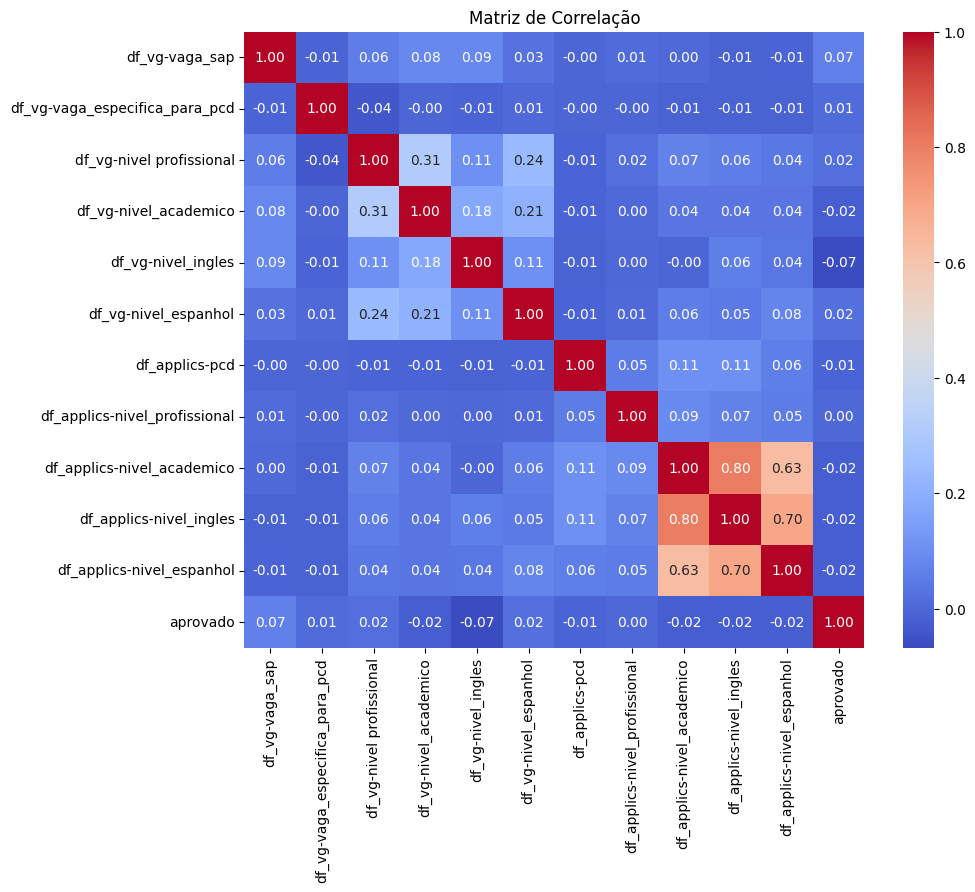

In [65]:
correlation_matrix = df_relevant_applicants_prospects_vagas_colunas_selecionadas.corr(numeric_only=True)

# Visualiza a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### **Separando os dados para treinamnto**

In [255]:
# selected_columns = df_relevant_applicants_prospects_vagas_colunas_selecionadas.select_dtypes(include=['int64']).columns.values.tolist()
# selected_columns.remove('aprovado')
# selected_columns

In [256]:
# X = df_relevant_applicants_prospects_vagas_colunas_selecionadas[selected_columns]
# y = df_relevant_applicants_prospects_vagas_colunas_selecionadas['aprovado']


#### **Gerando os dados de treino e teste**

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [258]:
type(y_train)

numpy.ndarray

In [197]:
X_train.shape

(17294, 96)

In [255]:
# reshape() molda uma matriz sem alterar os dados da matriz.
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

#### **Aplicando o Oversampling**

In [261]:
# count_class = y.value_counts()
# count_class

In [ ]:
count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Análise de candidatos')
plt.xticks(count_class.index.sort_values(), ['Reprovados', 'Aprovados'])
plt.show()

In [256]:
from imblearn.over_sampling import SMOTE

# smote=SMOTE(sampling_strategy='minority') 
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### **Contruindo a rede neural**

In [182]:
import tensorflow as tf

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

In [184]:
type(X_train)

numpy.ndarray

In [183]:
y_train.shape[1]

1

In [185]:
from tensorflow.keras.metrics import AUC

In [257]:
# Semente aleatótia para manter os mesmos dados
tf.random.set_seed(7)

# Definindo entradas da rede + tamanho da batch de processamento
# input_shape = X_train.shape[1]    # Variáveis de entrada
# output_shape = y_train.shape[1]   # Classe preditora

input_shape = X_resampled.shape[1]    # Variáveis de entrada
output_shape = 1   # Classe preditora
batch_size = 20

# Abrindo uma sequencia de neuronios
model = models.Sequential()

# input layer
# Entrada da rede
model.add(layers.Dense(
                        128
                       ,input_shape=(input_shape,)
                       ,activation='relu'))


# hidden layer
# Camada oculta
model.add(layers.Dense(
                        64
                       ,activation='relu'))


# hidden layer
# Camada oculta
model.add(layers.Dense(
                        32
                       ,activation='relu'))



# dropout layer
# Aplicando regularização
model.add(layers.Dropout(0.3))

# output layer
# Camada de saída
model.add(layers.Dense(
                        output_shape
                       ,activation='sigmoid'))

# Configurar o otimizador Adam com uma learning rate específica
# Defina a learning rate desejada
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

# Compilar o modelo com o otimizador configurado
model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy', AUC(name='auc')])

# summmary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 128)               12288     
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22657 (88.50 KB)
Trainable params: 22657 (88.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Testando balanceamento via compute_class_weight
##### O Keras permite atribuir peso maior à classe minoritária durante o treinamento. Isso ajuda a forçar o modelo a prestar mais atenção nos casos de rejeição, mesmo que sejam poucos.

In [261]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)

In [ ]:
# class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
# print(class_weight_dict)

{0: np.float64(2.0602652825836216), 1: np.float64(0.6602291628164849)}


In [258]:
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 50

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
                #   ,class_weight=class_weight_dict
          )


100%|█| 50/50 [00:57<00:00,  1.15s/epoch, loss=0.39, accuracy=0.831, auc=0.825, val_loss=


In [259]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")

O modelo possui uma acurácia de 83.15% com 50 epochs de processamento


In [262]:
y_pred = (model.predict(X_resampled) > 0.75).astype(int)
print("--------Matrix de Confusão---------")
print(confusion_matrix(y_resampled, y_pred))
print("--------Report---------------------")
print(classification_report(y_resampled, y_pred))

616/616 [==============================] - 1s 1ms/step
--------Matrix de Confusão---------
[[6467 3382]
 [1797 8052]]
--------Report---------------------
              precision    recall  f1-score   support

         0.0       0.78      0.66      0.71      9849
         1.0       0.70      0.82      0.76      9849

    accuracy                           0.74     19698
   macro avg       0.74      0.74      0.74     19698
weighted avg       0.74      0.74      0.74     19698



In [264]:
# 💾 Salvar artefatos para produção
import joblib
model.save('modelo_mlp_aprovacao.h5')
joblib.dump(encoder, 'encoder_categorias.joblib')
joblib.dump(scaler, 'scaler_remuneracao.joblib')
# np.save('sbert_vaga_embeddings.npy', embeddings_vaga)
# np.save('sbert_candidato_embeddings.npy', embeddings_candidatos)

['scaler_remuneracao.joblib']

### Agregando tudo em um joblib

In [388]:
from tensorflow.keras.models import load_model

modelo = load_model("modelo_mlp_aprovacao.h5")
encoder = joblib.load("encoder_categorias.joblib")
scaler = joblib.load("scaler_remuneracao.joblib")
emb_vaga = np.load("sbert_vaga_embeddings.npy")
emb_candidato = np.load("sbert_candidato_embeddings.npy")

In [389]:
pipeline_completo = {
    "modelo": modelo,
    "encoder": encoder,
    "scaler": scaler,
    "emb_vaga": emb_vaga,
    "emb_candidato": emb_candidato
}

In [390]:
joblib.dump(pipeline_completo, "pipeline_mlp_aprovacao_compacto.joblib")

['pipeline_mlp_aprovacao_compacto.joblib']

### Inferência

In [137]:
# carregamento
bundle = joblib.load("pipeline_mlp_aprovacao_compacto.joblib")
model = bundle["modelo"]
encoder = bundle["encoder"]
scaler = bundle["scaler"]